In [1]:
# Project title - Employee Diwali Sales Analysis
#Participant - 1.Vikrant Purushottam more 

In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import os

In [5]:
os.getcwd()

'C:\\Users\\user'

In [9]:
os.chdir('C:\\Users\\user\\Downloads')      #(encoding = 'unicode_escape') if error comes while encoding

In [11]:
df= pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')


In [13]:
df.shape

(11251, 15)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [23]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [25]:
# drop null values
df.dropna(inplace=True)         #To Save the changes we have done we have used the inplace =True

In [27]:
# change data type
df['Amount'] = df['Amount'].astype('int')  # To change the function used is astype

In [29]:
df['Amount'].dtypes  # to check if it is changed or not

dtype('int32')

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [33]:
#rename column
df.rename(columns= {'Marital_Status':'Lagn'})   # {} in this curly braces there is dictionary the first one is key : Pair,  we have not saved it 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Lagn,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [35]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [37]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()  # In double square bracket we can derscibe the specific columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [43]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:      #For getting values in the columns of the countplot
    ax.bar_label(bars)

In [44]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)  #Sales gen is the name of the data frame

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

In [49]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender') # hue dividess the columns into male and female genderwise

for bars in ax.containers:
    ax.bar_label(bars)

In [51]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [55]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)  #Only wanted to see top 10 states

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='Gender', ylabel='count'>

In [57]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [61]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [62]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [67]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [68]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

In [73]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [74]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Gender', ylabel='count'>

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [76]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Gender', ylabel='count'>

In [78]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

Thank you!

# EMPLOYEE KPI DASHBOARD
**3 Metrics: Total Sales | Orders | Avg Order Value**


In [137]:
# Calculated KPIs 
kpi = df.groupby('User_ID')[['Amount','Orders']].sum()
kpi['AOV'] = (kpi['Amount']/kpi['Orders']).round(0)
kpi = kpi.reset_index()
kpi.columns = ['EmployeeID','Sales','Orders','AOV']

print(f"  {len(kpi):,} employees")
print(f" ₹{kpi['Sales'].sum():,.0f} total sales")


  3,752 employees
 ₹106,249,129 total sales


TOP 10:
Emp 1001680.0: ₹ 281,034
Emp 1001941.0: ₹ 239,147
Emp 1003476.0: ₹ 220,435
Emp 1002665.0: ₹ 201,104
Emp 1003808.0: ₹ 197,660
Emp 1004425.0: ₹ 194,343
Emp 1003618.0: ₹ 189,921
Emp 1000424.0: ₹ 187,679
Emp 1004682.0: ₹ 185,122
Emp 1001298.0: ₹ 184,045


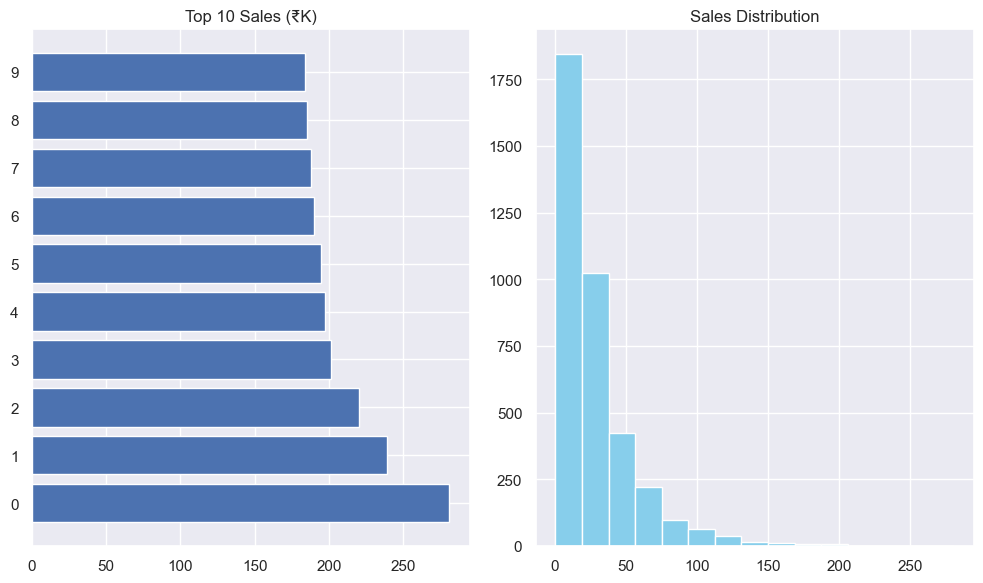

In [133]:
# Top 10 
top10 = kpi.nlargest(10,'Sales')
print("TOP 10:")
for i, r in top10.iterrows():
    print(f"Emp {r['EmployeeID']:6}: ₹{r['Sales']:8,.0f}")

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.barh(range(10), top10['Sales']/1000)
plt.title('Top 10 Sales (₹K)'); plt.yticks(range(10))
plt.subplot(122)
plt.hist(kpi['Sales']/1000, bins=15, color='skyblue')
plt.title('Sales Distribution')
plt.tight_layout(); plt.show()


In [141]:
# EXPORT BOTH FILES: All Employees + Top 10 Performers
kpi.to_csv('Employee_KPIs_ALL.csv', index=False)

# TOP 10 PERFORMERS FILE 
top10_performers = kpi.nlargest(10, 'Sales')[['EmployeeID', 'Sales', 'Orders', 'AOV']]
top10_performers.to_csv('Top_10_Performers.csv', index=False)

print(top10_perf.assign(Sales='₹'+top10_perf['Sales'].astype(str)+'/-', 
                       AOV='₹'+top10_perf['AOV'].astype(str)+'/-.'))


      EmployeeID      Sales  Orders         AOV
1045     1001680  ₹281034/-      58  ₹4845.0/-.
1197     1001941  ₹239147/-      52  ₹4599.0/-.
2134     1003476  ₹220435/-      57  ₹3867.0/-.
1628     1002665  ₹201104/-      50  ₹4022.0/-.
2355     1003808  ₹197660/-      55  ₹3594.0/-.
2741     1004425  ₹194343/-      48  ₹4049.0/-.
2226     1003618  ₹189921/-      39  ₹4870.0/-.
274      1000424  ₹187679/-      48  ₹3910.0/-.
2897     1004682  ₹185122/-      51  ₹3630.0/-.
807      1001298  ₹184045/-      44  ₹4183.0/-.
